# 損失関数 (Loss Functions)

損失関数はニューラルネットワークにおいて、モデルの出力と目的値との間の誤差を計測するための関数のことです。このため、損失関数は誤差関数とも言われています。  
機械学習では入力の値に対してパラメータを調整して、求める出力の値に近づけていきます。

問題の種類によって、以下の損失関数を分類分けすることができます。

* 回帰
* クラス分類

ここでは、損失関数の概要を説明し、TensorFlowで使う場合のサンプルコードを紹介したいと思います。

## 事前準備

まずサンプルコードで使用するパッケージをインポートして、説明に必要なデータを定義します。

In [113]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()

zero_values_op = tf.zeros([300])
one_values_op = tf.ones([300])

predictions_op = tf.linspace(-3.0, 3.0, 300)
logits_op = tf.linspace(-3.0, 5.0, 300)

predictions = sess.run(predictions_op)
logits = sess.run(logits_op)

## 回帰用途の損失関数

回帰で用いられる損失関数は以下のものがあります。  
これらは出力に連続値を取るような目的の値を対象としています。

* L1 Loss (絶対損失関数)
* L2 Loss (ユークリッド損失関数)
* Huber損失関数

### L1損失関数 (絶対損失関数)

[tf.losses.absolute_difference](https://www.tensorflow.org/api_docs/python/tf/losses/absolute_difference)

In [114]:
l1_loss_values = sess.run(tf.losses.absolute_difference(
    zero_values_op,
    predictions_op,
    reduction=tf.losses.Reduction.NONE
))

### L2損失関数 (ユークリッド損失関数)

[tf.nn.l2_loss](https://www.tensorflow.org/api_docs/python/tf/nn/l2_loss)

In [115]:
l2_loss_values = sess.run(tf.square(zero_values_op - predictions_op))

### Huber損失関数

[tf.losses.huber_loss](https://www.tensorflow.org/api_docs/python/tf/losses/huber_loss)

In [116]:
huber_loss_values = sess.run(tf.losses.huber_loss(
    zero_values_op,
    predictions_op,
    reduction=tf.losses.Reduction.NONE
))

### 回帰用途の各損失関数の比較

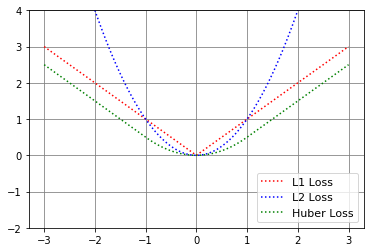

In [117]:
plt.plot(predictions, l1_loss_values,    'r:', label='L1 Loss')
plt.plot(predictions, l2_loss_values,    'b:', label='L2 Loss')
plt.plot(predictions, huber_loss_values, 'g:', label='Huber Loss')

plt.ylim(-2.0, 4.0)
plt.grid(color='gray')
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## 分類用途の損失関数

多クラス分類で用いられる損失関数は以下のものがあります。

* ヒンジ損失関数 (Hinge Loss Function)
* 交差エントロピー損失関数
* シグモイド交差エントロピー損失関数
* 重み付き交差エントロピー損失関数
* ソフトマックス交差エントロピー損失関数

### ヒンジ損失関数 (Hinge Loss Function)

[tf.losses.hinge_loss](https://www.tensorflow.org/api_docs/python/tf/losses/hinge_loss)

In [118]:
hinge_loss_values = sess.run(tf.losses.hinge_loss(
    one_values_op,
    logits_op,
    reduction=tf.losses.Reduction.NONE
))

### 交差エントロピー損失関数

In [119]:
cross_entropy_loss_values = sess.run(
    -tf.multiply(tf.constant(1.0), tf.log(logits)) - tf.multiply((1.0 - tf.constant(1.0)), tf.log(1.0 - logits))
)

NameError: name 'target_c' is not defined

### シグモイド交差エントロピー損失関数

* [tf.losses.sigmoid_cross_entropy](https://www.tensorflow.org/api_docs/python/tf/losses/sigmoid_cross_entropy)
* [tf.nn.sigmoid_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)

In [ ]:
sigmoid_cross_entropy_loss_values = sess.run(tf.nn.sigmoid_cross_entropy_with_logits(
    labels=one_values_op,
    logits=logits_op
))

### 重み付き交差エントロピー損失関数

* [tf.nn.weighted_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/weighted_cross_entropy_with_logits)

In [ ]:
pos_weight = tf.constant(0.5)
weighted_cross_entropy_loss_values = sess.run(tf.nn.weighted_cross_entropy_with_logits(
    one_values_op,
    logits_op,
    pos_weight
))

### ソフトマックス交差エントロピー損失関数

* [tf.losses.softmax_cross_entropy](https://www.tensorflow.org/api_docs/python/tf/losses/softmax_cross_entropy)
* [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits)

In [ ]:
softmax_cross_entropy_loss_values = sess.run(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=tf.constant([[0.1, 0.02, 0.88]]),
        logits=tf.constant([[1.0, -3.0, 10.0]])
    )
)

print(softmax_cross_entropy_loss_values)

### 疎なソフトマックス交差エントロピー損失関数

* [tf.losses.sparse_softmax_cross_entropy](https://www.tensorflow.org/api_docs/python/tf/losses/sparse_softmax_cross_entropy)
* [tf.nn.sparse_softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/sparse_softmax_cross_entropy_with_logits)

In [ ]:
sparse_softmax_cross_entropy_loss_values = sess.run(
    tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=tf.constant([2]),
        logits=tf.constant([[1.0, -3.0, 10.0]])
    )
)

print(sparse_softmax_cross_entropy_loss_values)

### 分類用途の各損失関数の比較

In [ ]:
plt.plot(logits, hinge_loss_values,                  'r:', label='Hinge Loss')
plt.plot(logits, cross_entropy_loss_values,          'b:', label='Cross Entropy Loss')
plt.plot(logits, sigmoid_cross_entropy_loss_values,  'g:', label='Sigmoid Cross Entropy Loss')
plt.plot(logits, weighted_cross_entropy_loss_values, 'k--', label='Weighted Cross Entropy Loss')

plt.ylim(-2, 4.0)
plt.grid(color='gray')
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## 参照

* 4.2 損失関数
* [Losses - Neural Network - TensorFlow](https://www.tensorflow.org/api_guides/python/nn#Losses)
* [活性化関数 - WikiPedia](https://ja.wikipedia.org/wiki/活性化関数)
* [交差エントロピー - WikiPedia](https://ja.wikipedia.org/wiki/交差エントロピー)
* [損失関数について、ざっくりと考える - Qiita](https://qiita.com/mine820/items/f8a8c03ef1a7b390e372)
* [機械学習で抑えておくべき損失関数（回帰編） - HELLO CYBERNETICS](http://s0sem0y.hatenablog.com/entry/2017/06/19/084210)